In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
gold_data.head()  #First 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail()  #Last 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#no of rows and columns
gold_data.shape

(2290, 6)

In [8]:
#Basic info of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
# Convert date columns to datetime (if there is a date column)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [15]:
#Checking no of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [16]:
#getting the statistical measures of the data
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


*Correlation   1. Positive correlation    2. negative correlation*

In [17]:
correlation = gold_data.corr()

<Axes: >

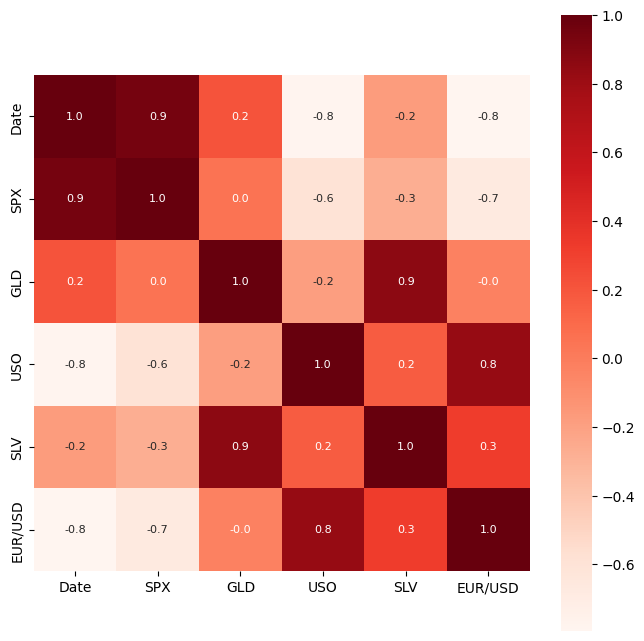

In [20]:
#Constructing heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar= True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap=  'Reds')

In [21]:
#Correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-23-4bb4cad06cac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

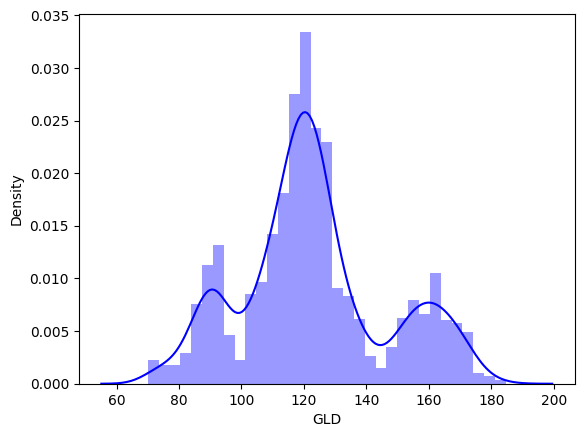

In [23]:
#Checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='blue')

*Splitting features and Target*

In [25]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [26]:
# Train-Test Split between Training + Development vs Test
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Now we have to split between Training vs Development
x_train,x_dev,y_train,y_dev= train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)
print('Training set size: ',x_train.shape)
print('Development set size: ',x_dev.shape)
print('Test set size: ',x_test.shape)

Training set size:  (1465, 4)
Development set size:  (367, 4)
Test set size:  (458, 4)


*Model Training : Random Forest Regressor*

In [50]:
reg= RandomForestRegressor(n_estimators=100)    #If you don't write n_estimators then It will automatically train the random forest with 100 trees.

*Train the model*

In [51]:
reg.fit(x_train,y_train)

RandomForestRegressor()

*Model Evaluation*

In [52]:
#Prediction on development data (Validation)
y_dev_pred= reg.predict(x_dev)

In [53]:
#R squared error
error_score= metrics.r2_score(y_dev,y_dev_pred)
print('R squared error: ',error_score)

R squared error:  0.9863858764259257


*Compare the actual vvalue with the predicted values*

In [54]:
#Predict and evaluate the Test set
y_test_pred=reg.predict(x_test)

In [55]:
#R squared error
error_score= metrics.r2_score(y_test,y_test_pred)
print('R squared error: ',error_score)

R squared error:  0.9885359177497822


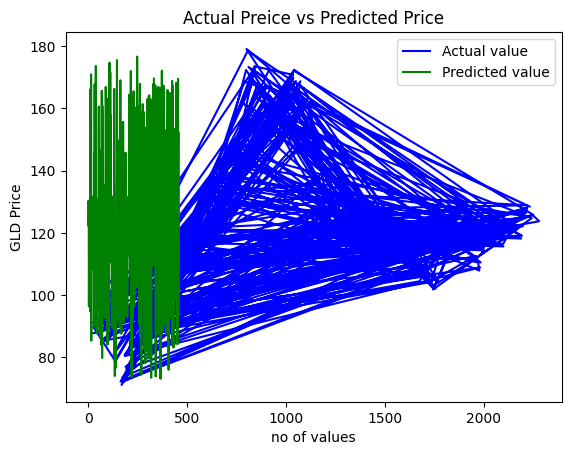

In [56]:
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(y_test_pred,color='green',label='Predicted value')
plt.title('Actual Preice vs Predicted Price')
plt.xlabel('no of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()